#Load Library

In [ ]:
#Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

#Read Data

In [ ]:
#Load the data
df=pd.read_excel('/content/V2 Gies Sales Account 360 Data Set.xlsx')
df.head()

,Period,Load,Company ID,Customer #/Ship To,Company,State,Tier,Weight,Cases,Lines,Pallets,Cases/Line,PO Count,Item Spread,Dock Time (Hours)
0,1,9643113,13831201,138312-01,GROCERY SUPPLY/SULPHUR SP,TX,Tier I,28709.0,3810.0,270.0,15.0,14.111111,61.0,NaN,3.279180
1,1,9642714,12654200,126542-00,M R WILLIAMS,NC,Tier I,9542.0,1492.0,105.0,6.0,14.209524,13.0,NaN,3.658055
2,1,9642777,12654200,126542-00,M R WILLIAMS,NC,Tier I,30658.0,5007.0,255.0,20.0,19.635294,1.0,NaN,6.183348
3,1,9642693,23820501,238205-01,K-VA-T,VA,Tier I,24511.0,2673.0,77.0,25.0,34.714286,1.0,NaN,2.319731
4,1,9642532,346000,003460-00,PERF FS/BOWLING GREEN,KY,Corporates,30827.0,1510.0,128.0,11.0,11.796875,8.0,NaN,2.116949


#Data Summary

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96805 entries, 0 to 96804
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Period              96805 non-null  int64  
 1   Load                96805 non-null  int64  
 2   Company ID          96805 non-null  int64  
 3   Customer #/Ship To  96805 non-null  object 
 4   Company             96805 non-null  object 
 5   State               96805 non-null  object 
 6   Tier                96805 non-null  object 
 7   Weight              96799 non-null  float64
 8   Cases               96799 non-null  float64
 9   Lines               96799 non-null  float64
 10  Pallets             96799 non-null  float64
 11  Cases/Line          96799 non-null  float64
 12  PO Count            92792 non-null  float64
 13  Item Spread         95970 non-null  float64
 14  Dock Time (Hours)   96805 non-null  float64
dtypes: float64(8), int64(3), object(4)
memory usage: 11.1

In [ ]:
df.describe()

,Period,Load,Company ID,Weight,Cases,Lines,Pallets,Cases/Line,PO Count,Item Spread,Dock Time (Hours)
count,96805.000000,9.680500e+04,9.680500e+04,96799.000000,96799.000000,96799.000000,96799.000000,96799.000000,92792.000000,95970.000000,96805.000000
mean,6.878012,4.933618e+06,1.422729e+07,16728.958543,1419.309001,93.943037,9.520491,39.767561,5.061180,0.065418,2.854558
std,3.688658,4.230908e+06,8.260835e+06,11931.279313,1125.961358,99.326285,8.705397,114.057957,7.388815,0.076373,2.835945
min,1.000000,1.001137e+06,4.400000e+03,-3.000000,-29.000000,1.000000,-4.000000,-0.966667,1.000000,0.000000,0.000000
25%,4.000000,1.232107e+06,1.246711e+07,6107.000000,449.000000,24.000000,2.000000,9.488889,1.000000,0.029605,0.800282
50%,7.000000,1.481027e+06,1.411560e+07,13614.000000,1143.000000,66.000000,7.000000,17.237410,3.000000,0.050000,2.015277
75%,10.000000,9.782430e+06,2.221620e+07,26565.000000,2180.000000,131.000000,15.000000,33.200000,6.000000,0.081967,4.202225
max,13.000000,9.999797e+06,2.434420e+07,145469.000000,10900.000000,1080.000000,122.000000,6160.000000,112.000000,10.000000,23.999732


#Check Missing Values

In [ ]:
#Check with missing values
# numbers and percentage
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({"Missing Values": missing_values, "Percentage": missing_percentage})
print(missing_df)

                    Missing Values  Percentage
Period                           0    0.000000
Load                             0    0.000000
Company ID                       0    0.000000
Customer #/Ship To               0    0.000000
Company                          0    0.000000
State                            0    0.000000
Tier                             0    0.000000
Weight                           6    0.006198
Cases                            6    0.006198
Lines                            6    0.006198
Pallets                          6    0.006198
Cases/Line                       6    0.006198
PO Count                      4013    4.145447
Item Spread                    835    0.862559
Dock Time (Hours)                0    0.000000


#Drop Values if Needed

In [ ]:
#Deal with missing values
df.dropna(subset=["Weight", "Cases", "Lines", "Pallets", "Cases/Line"], how="any", inplace=True)
df["Tier"].fillna("No Tier Assignment", inplace=True)
df.dropna(subset=["Item Spread"], inplace=True)
missing_values_after = df.isnull().sum()
print("Missing Values After Dropping:")
print(missing_values_after)

Missing Values After Dropping:
Period                   0
Load                     0
Company ID               0
Customer #/Ship To       0
Company                  0
State                    0
Tier                     0
Weight                   0
Cases                    0
Lines                    0
Pallets                  0
Cases/Line               0
PO Count              3955
Item Spread              0
Dock Time (Hours)        0
dtype: int64


#Check Negative Values

In [ ]:
#Negative values
negative_weights = df[df["Weight"] < 0].shape[0]
negative_cases = df[df["Cases"] < 0].shape[0]
negative_pallets = df[df["Pallets"] < 0].shape[0]
negative_cases_line = df[df["Cases/Line"] < 0].shape[0]
print("Negative Weights:", negative_weights)
print("Negative Cases:", negative_cases)
print("Negative Pallets:", negative_pallets)
print("Negative Cases/Line:", negative_cases_line)

Negative Weights: 1
Negative Cases: 1
Negative Pallets: 1
Negative Cases/Line: 1


In [ ]:
#Drop negative values
df = df[
    (df["Weight"] >= 0) &
    (df["Cases"] >= 0) &
    (df["Lines"] >= 0) &
    (df["Pallets"] >= 0) &
    (df["Cases/Line"] >= 0)
]

In [ ]:
df.describe()

,Period,Load,Company ID,Weight,Cases,Lines,Pallets,Cases/Line,PO Count,Item Spread,Dock Time (Hours)
count,96798.000000,9.679800e+04,9.679800e+04,96798.000000,96798.000000,96798.000000,96798.000000,96798.000000,92790.000000,95967.000000,96798.000000
mean,6.878190,4.933443e+06,1.422750e+07,16729.131397,1419.323963,93.943697,9.520631,39.767982,5.061224,0.065418,2.854677
std,3.688705,4.230874e+06,8.260742e+06,11931.219739,1125.957551,99.326586,8.705333,114.058471,7.388887,0.076374,2.835971
min,1.000000,1.001137e+06,4.400000e+03,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,4.000000,1.232107e+06,1.246711e+07,6107.000000,449.000000,24.000000,2.000000,9.488978,1.000000,0.029605,0.800553
50%,7.000000,1.481026e+06,1.411560e+07,13614.500000,1143.000000,66.000000,7.000000,17.237455,3.000000,0.050000,2.015283
75%,10.000000,9.782426e+06,2.221620e+07,26565.000000,2180.000000,131.000000,15.000000,33.200000,6.000000,0.081967,4.202245
max,13.000000,9.999797e+06,2.434420e+07,145469.000000,10900.000000,1080.000000,122.000000,6160.000000,112.000000,10.000000,23.999732


#Data Exploration

## Goals
To Identify Customers That Could be Pursuaded to Order More

Ideal Customer

* A high number of orders or loads.
* Large order sizes, both in terms of cases and weight.
* Efficient operations (low dock time).
* High strategic importance, indicated by being in "Tier I/Tier III" or Corporate(Depends on the Focus)
* Larger purchase quantities and diverse orders (high PO Count).


## Which State is the Most Active

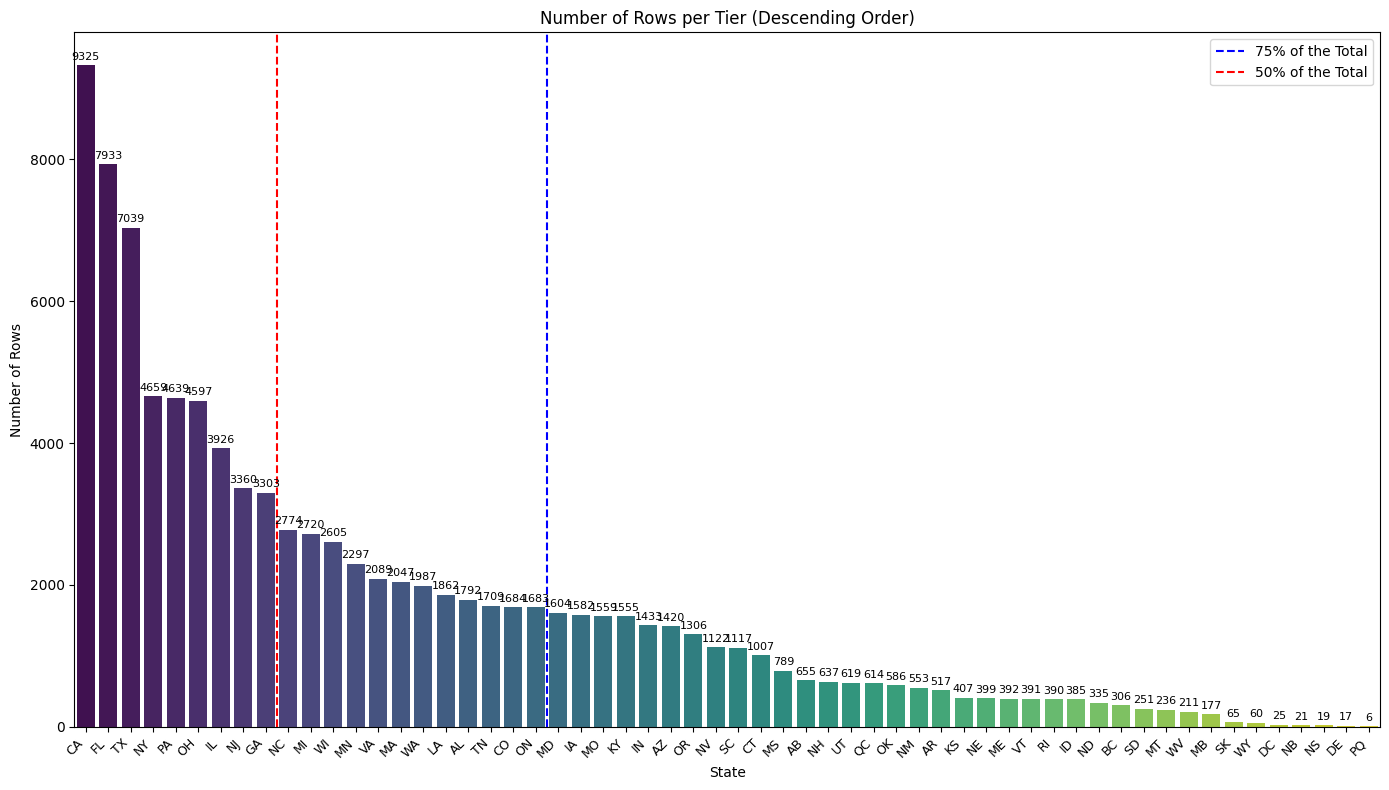

In [ ]:
# Count rows per tier (State)
tier_counts = df['State'].value_counts().sort_values(ascending=False)

# Visualize with bar chart and labels
plt.figure(figsize=(14, 8))  # Increase the figure size
ax = sns.barplot(x=tier_counts.index, y=tier_counts.values, palette='viridis')
plt.xlabel('State')
plt.ylabel('Number of Rows')
plt.title('Number of Rows per Tier (Descending Order)')

# Rotate x-axis labels and adjust their font size
plt.xticks(rotation=45, ha='right', fontsize=9)

# Add labels to bars with adjusted positioning
for i, count in enumerate(tier_counts.values):
    ax.text(i, count + 50, str(count), ha='center', va='bottom', fontsize=8)

# Cumulative counts for adding 50% and 75% thresholds
cumulative_counts = tier_counts.cumsum()
total = tier_counts.sum()

# Add 75% cumulative threshold line
threshold_val = 0.75 * total
pos_75 = (cumulative_counts >= threshold_val).argmax()
plt.axvline(x=pos_75 + 0.5, color='blue', linestyle='--', label='75% of the Total')

# Add 50% cumulative threshold line
threshold_val_50 = 0.5 * total
pos_50 = (cumulative_counts >= threshold_val_50).argmax()
plt.axvline(x=pos_50 + 0.5, color='red', linestyle='--', label='50% of the Total')

# Show legend and adjust layout
plt.legend()
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

If we took account the number of order per state. We could improve the customer order by focusing state with high number of order(50% of all order), CA, FL, TX, NY, PA, OH, IL, NI, GA, NC

However, if we want to improve underrepresented customer(25% of all order), focus on MI, WI, MN, VA, MA, WA< LA, AL, TN, CO, ON, MD

The rest is the bottom 25%, which is prone to more cost and energy to improve their order

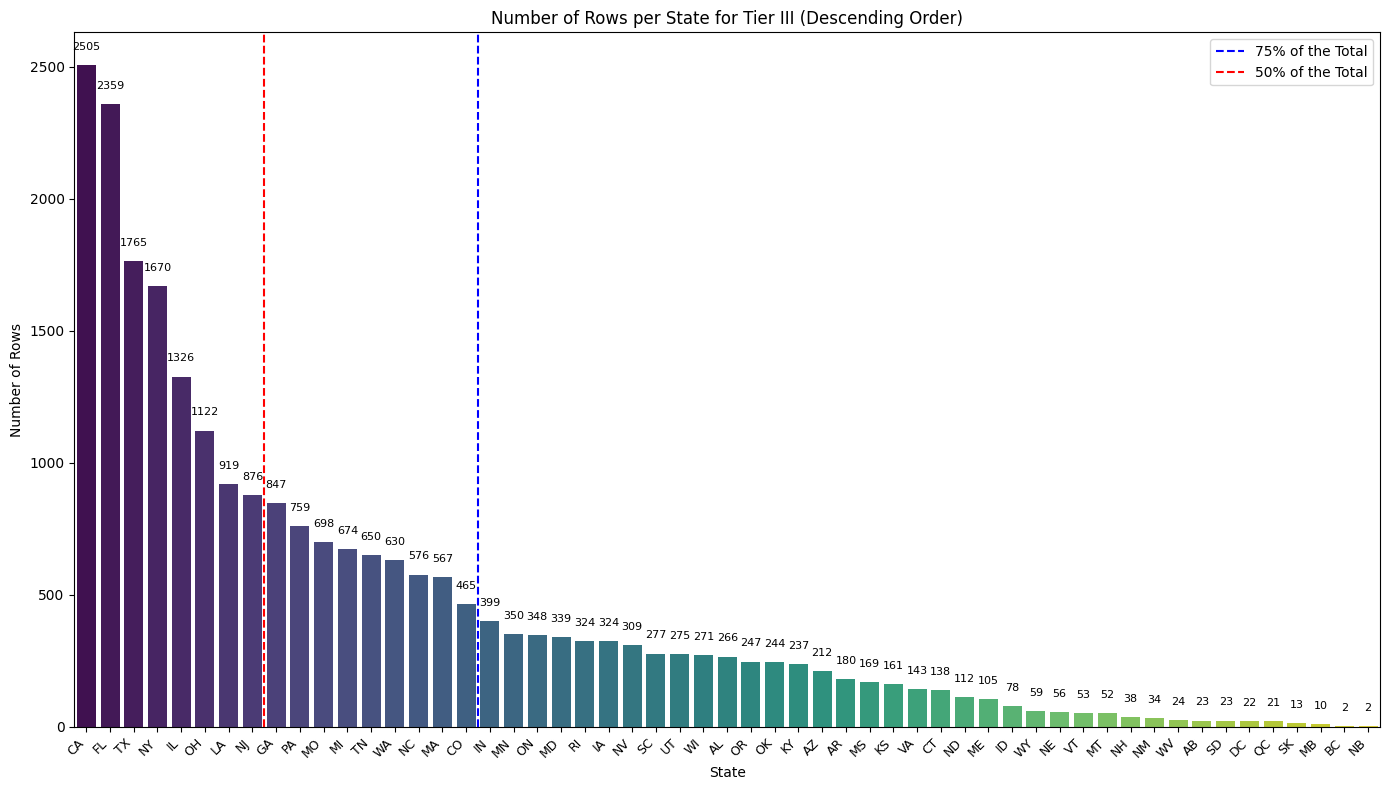

In [ ]:
# Filter the data to show only Tier III
tier_iii_data = df[df['Tier'] == 'Tier III']

# Count rows per state (only for Tier III)
tier_counts = tier_iii_data['State'].value_counts().sort_values(ascending=False)

# Visualize with bar chart and labels
plt.figure(figsize=(14, 8))  # Increase the figure size
ax = sns.barplot(x=tier_counts.index, y=tier_counts.values, palette='viridis')
plt.xlabel('State')
plt.ylabel('Number of Rows')
plt.title('Number of Rows per State for Tier III (Descending Order)')

# Rotate x-axis labels and adjust their font size
plt.xticks(rotation=45, ha='right', fontsize=9)

# Add labels to bars with adjusted positioning
for i, count in enumerate(tier_counts.values):
    ax.text(i, count + 50, str(count), ha='center', va='bottom', fontsize=8)

# Cumulative counts for adding 50% and 75% thresholds
cumulative_counts = tier_counts.cumsum()
total = tier_counts.sum()

# Add 75% cumulative threshold line
threshold_val = 0.75 * total
pos_75 = (cumulative_counts >= threshold_val).argmax()
plt.axvline(x=pos_75 + 0.5, color='blue', linestyle='--', label='75% of the Total')

# Add 50% cumulative threshold line
threshold_val_50 = 0.5 * total
pos_50 = (cumulative_counts >= threshold_val_50).argmax()
plt.axvline(x=pos_50 + 0.5, color='red', linestyle='--', label='50% of the Total')

# Show legend and adjust layout
plt.legend()
plt.tight_layout()  # Adjust layout to fit labels
plt.show()


## Which Tier Order the Most

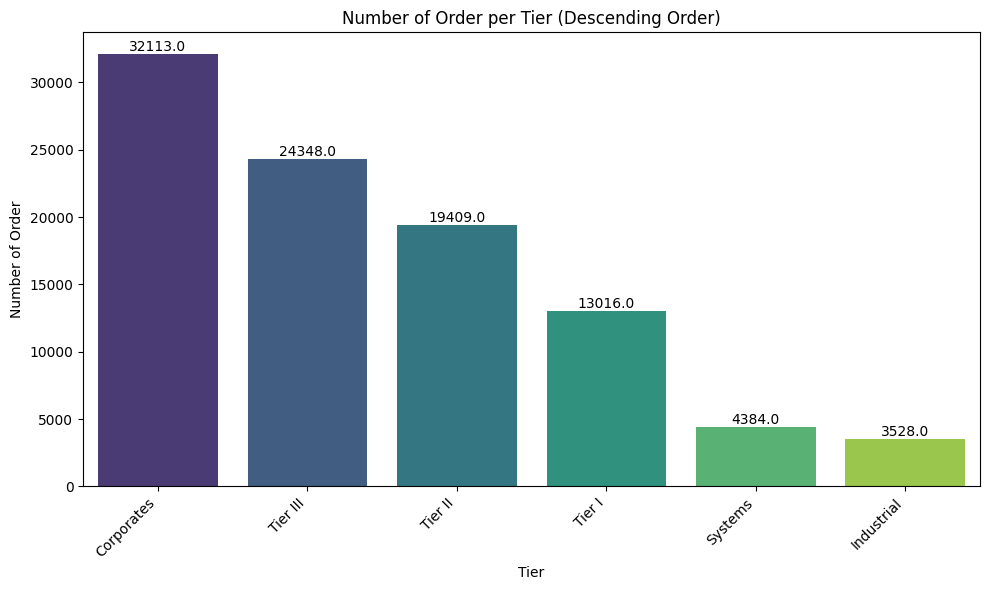

In [ ]:
# prompt: count rows per tier and visualize it bar chart and show the number label. descending of the number

# Count rows per tier
tier_counts = df.groupby('Tier')['Tier'].count().sort_values(ascending=False)

# Visualize with bar chart and labels
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=tier_counts.index, y=tier_counts.values, palette='viridis')
plt.xlabel('Tier')
plt.ylabel('Number of Order')
plt.title('Number of Order per Tier (Descending Order)')
plt.xticks(rotation=45, ha='right')

# Add labels above bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()


Assumption, Tier I is more important
If we want to improve the order, The easiest one would be corporate customer, because of their high number of orders. However, assuming Tier I is more important than Tier III, we can focus on Tier III and Tier II because they have high number of values. In case we want to increase loyalty focus on Tier I and Corporates because high number of values and importance. However if we want High to venture to new customer focus on Tier II and Tier III because they have high number of order but considered insignificant

## High Number of Order and Low Number of Order By Companies

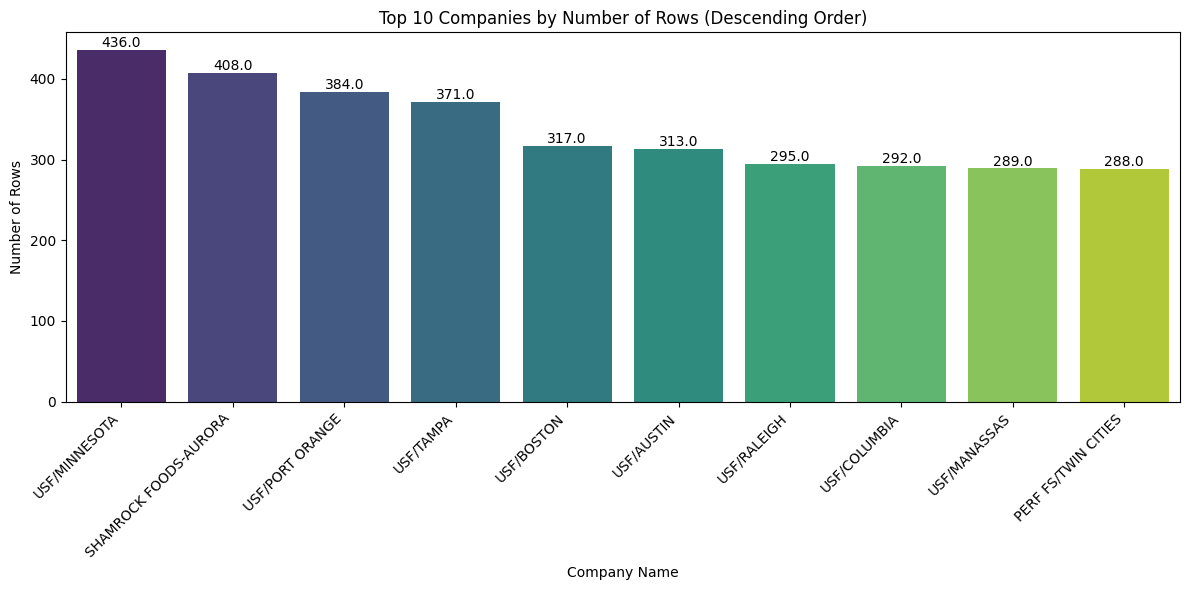

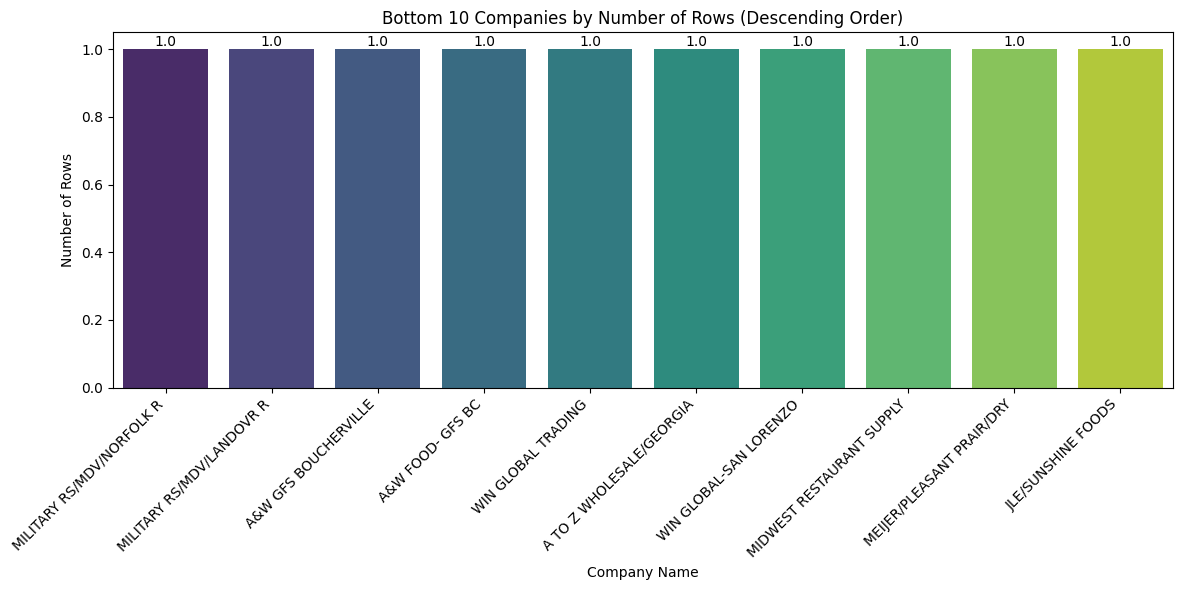

In [ ]:
# prompt: count rows per company name and visualize it bar chart and show the number label. descending of the number. only top 10 and bottom 10

# Count rows per company name
company_counts = df.groupby('Company')['Company'].count().sort_values(ascending=False)

# Get top 10 and bottom 10
top_10 = company_counts.head(10)
bottom_10 = company_counts.tail(10)

# Visualize with bar chart and labels
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_10.index, y=top_10.values, palette='viridis')
plt.xlabel('Company Name')
plt.ylabel('Number of Rows')
plt.title('Top 10 Companies by Number of Rows (Descending Order)')
plt.xticks(rotation=45, ha='right')

# Add labels above bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=bottom_10.index, y=bottom_10.values, palette='viridis')
plt.xlabel('Company Name')
plt.ylabel('Number of Rows')
plt.title('Bottom 10 Companies by Number of Rows (Descending Order)')
plt.xticks(rotation=45, ha='right')

# Add labels above bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()


USF looks very common lets count how many of the orders are from USF

In [ ]:
# prompt: count how many rows has USF in the company column. use regex. and count how many percent of it compared to total rows

import pandas as pd
import re

# Assuming your DataFrame is named 'df'
# ... (Your existing code to load and process the DataFrame)

# Count rows where the 'Company' column contains 'USF' using regex
usf_rows = df[df['Company'].str.contains('USF', regex=True, na=False)]
usf_count = len(usf_rows)

# Calculate the total number of rows
total_rows = len(df)

# Calculate the percentage
percentage_usf = (usf_count / total_rows) * 100 if total_rows > 0 else 0

print(f"Number of rows with 'USF' in the Company column: {usf_count}")
print(f"Percentage of rows with 'USF' compared to total rows: {percentage_usf:.2f}%")


Number of rows with 'USF' in the Company column: 4859
Percentage of rows with 'USF' compared to total rows: 5.02%


In [ ]:
# prompt: count the sum of PO count that of company with USF in the name. use regex. and count how many percent of it compared to total PO count

# Assuming your DataFrame is named 'df'
# ... (Your existing code to load and process the DataFrame)

# Count POs where the 'Company' column contains 'USF' using regex
usf_po_count = df[df['Company'].str.contains('USF', regex=True, na=False)]['PO Count'].sum()

# Calculate the total number of unique POs
total_po_count = df['PO Count'].sum()

# Calculate the percentage
percentage_usf_po = (usf_po_count / total_po_count) * 100 if total_po_count > 0 else 0

print(f"Number of unique POs with 'USF' in the Company column: {usf_po_count}")
print(f"Percentage of unique POs with 'USF' compared to total unique POs: {percentage_usf_po:.2f}%")


Number of unique POs with 'USF' in the Company column: 13852.0
Percentage of unique POs with 'USF' compared to total unique POs: 2.95%


About 5% of the order is from USF. This customer needs to be kept

Now we will see the distribution of the order

Company
0-10       1220
11-50      1526
51-100      328
101-300     157
301-500       6
Name: count, dtype: int64


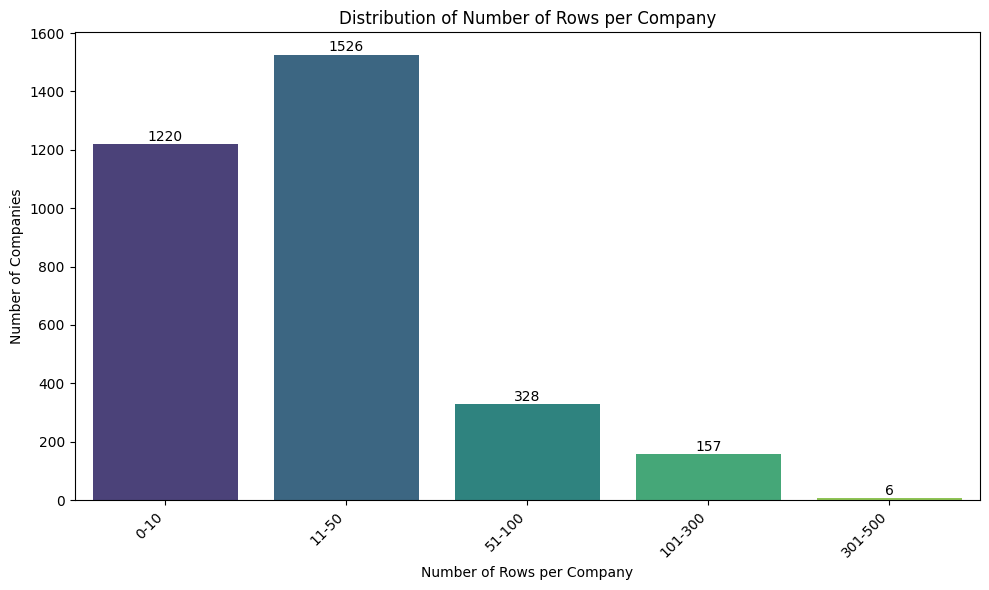

In [ ]:
# Create a bin of the number of company rows
bins = [0, 10, 50, 100, 300, float('inf')]
labels = ['0-10', '11-50', '51-100', '101-300', '301-500']

company_counts = df.groupby('Company')['Company'].count()
company_counts_binned = pd.cut(company_counts, bins=bins, labels=labels)
company_counts_binned_counts = company_counts_binned.value_counts().sort_index()

print(company_counts_binned_counts)

# Visualize the binned counts
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=company_counts_binned_counts.index, y=company_counts_binned_counts.values, palette='viridis')
plt.xlabel('Number of Rows per Company')
plt.ylabel('Number of Companies')
plt.title('Distribution of Number of Rows per Company')
plt.xticks(rotation=45, ha='right')

# Add labels to the bars
for i, count in enumerate(company_counts_binned_counts.values):
    ax.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


Company with 301-500 orders are considered loyal to us. however, we can still improve their oder. But the most accurate to focus is 51-100 and 101-300 Order

Company
0-10       608
11-50      654
51-100      70
101-300      2
301-500      0
Name: count, dtype: int64


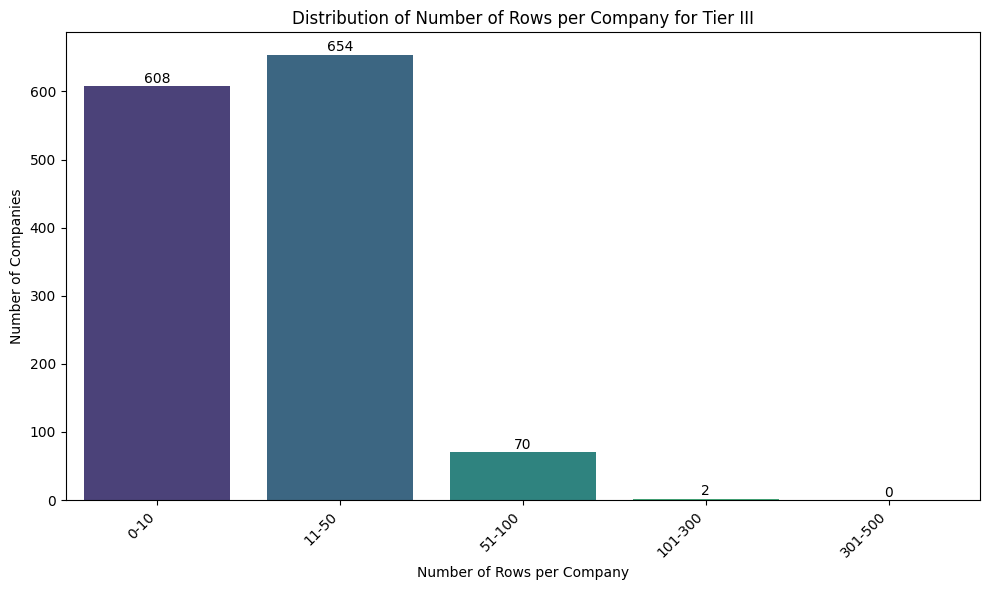

In [ ]:
# Filter the data to show only Tier III
tier_iii_data = df[df['Tier'] == 'Tier III']

# Create a bin of the number of company rows for Tier III only
tier_iii_company_counts = tier_iii_data.groupby('Company')['Company'].count()

# Create bins and labels
bins = [0, 10, 50, 100, 300, float('inf')]
labels = ['0-10', '11-50', '51-100', '101-300', '301-500']

# Bin the data
company_counts_binned = pd.cut(tier_iii_company_counts, bins=bins, labels=labels)
company_counts_binned_counts = company_counts_binned.value_counts().sort_index()

# Print the binned counts for Tier III
print(company_counts_binned_counts)

# Visualize the binned counts for Tier III
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=company_counts_binned_counts.index, y=company_counts_binned_counts.values, palette='viridis')
plt.xlabel('Number of Rows per Company')
plt.ylabel('Number of Companies')
plt.title('Distribution of Number of Rows per Company for Tier III')
plt.xticks(rotation=45, ha='right')

# Add labels to the bars
for i, count in enumerate(company_counts_binned_counts.values):
    ax.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


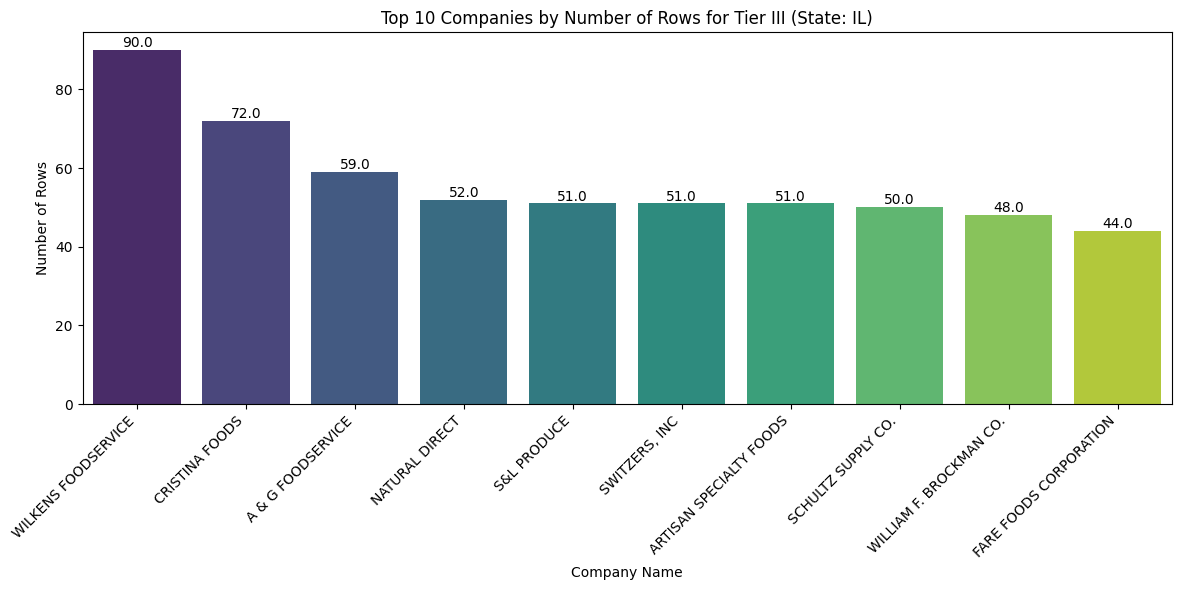

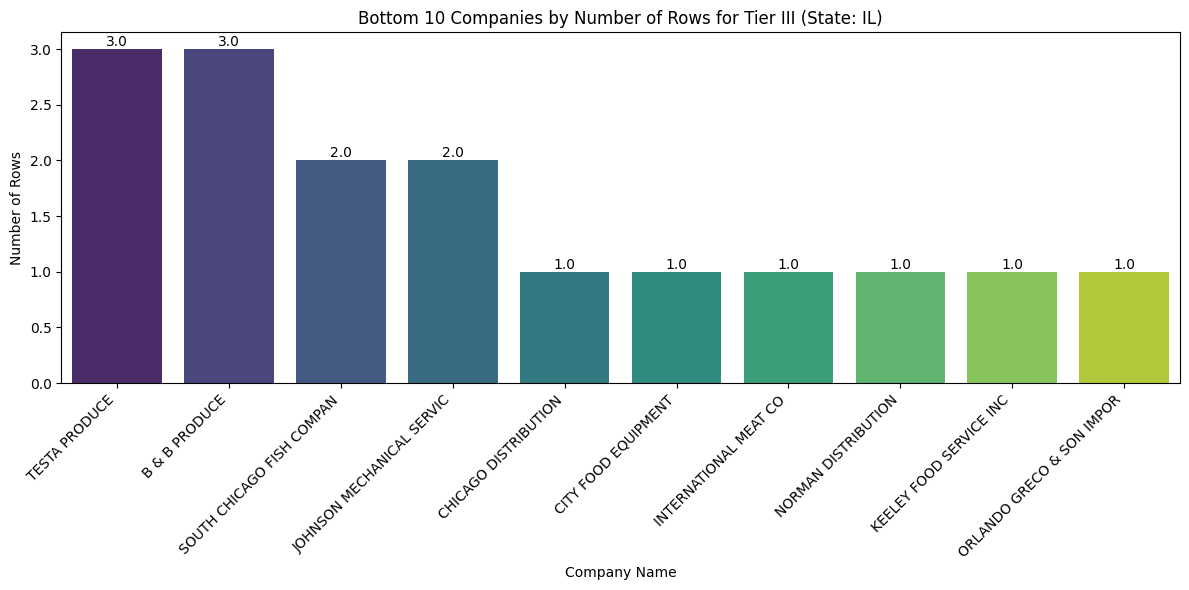

In [ ]:
# Filter the data to show only Tier III and State = IL
tier_iii_il_data = df[(df['Tier'] == 'Tier III') & (df['State'] == 'IL')]

# Count rows per company name for Tier III and State = IL
company_counts = tier_iii_il_data.groupby('Company')['Company'].count().sort_values(ascending=False)

# Get top 10 and bottom 10 companies
top_10 = company_counts.head(10)
bottom_10 = company_counts.tail(10)

# Visualize top 10 companies with bar chart and labels
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_10.index, y=top_10.values, palette='viridis')
plt.xlabel('Company Name')
plt.ylabel('Number of Rows')
plt.title('Top 10 Companies by Number of Rows for Tier III (State: IL)')
plt.xticks(rotation=45, ha='right')

# Add labels above bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

# Visualize bottom 10 companies with bar chart and labels
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=bottom_10.index, y=bottom_10.values, palette='viridis')
plt.xlabel('Company Name')
plt.ylabel('Number of Rows')
plt.title('Bottom 10 Companies by Number of Rows for Tier III (State: IL)')
plt.xticks(rotation=45, ha='right')

# Add labels above bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()


## What to Improve then?

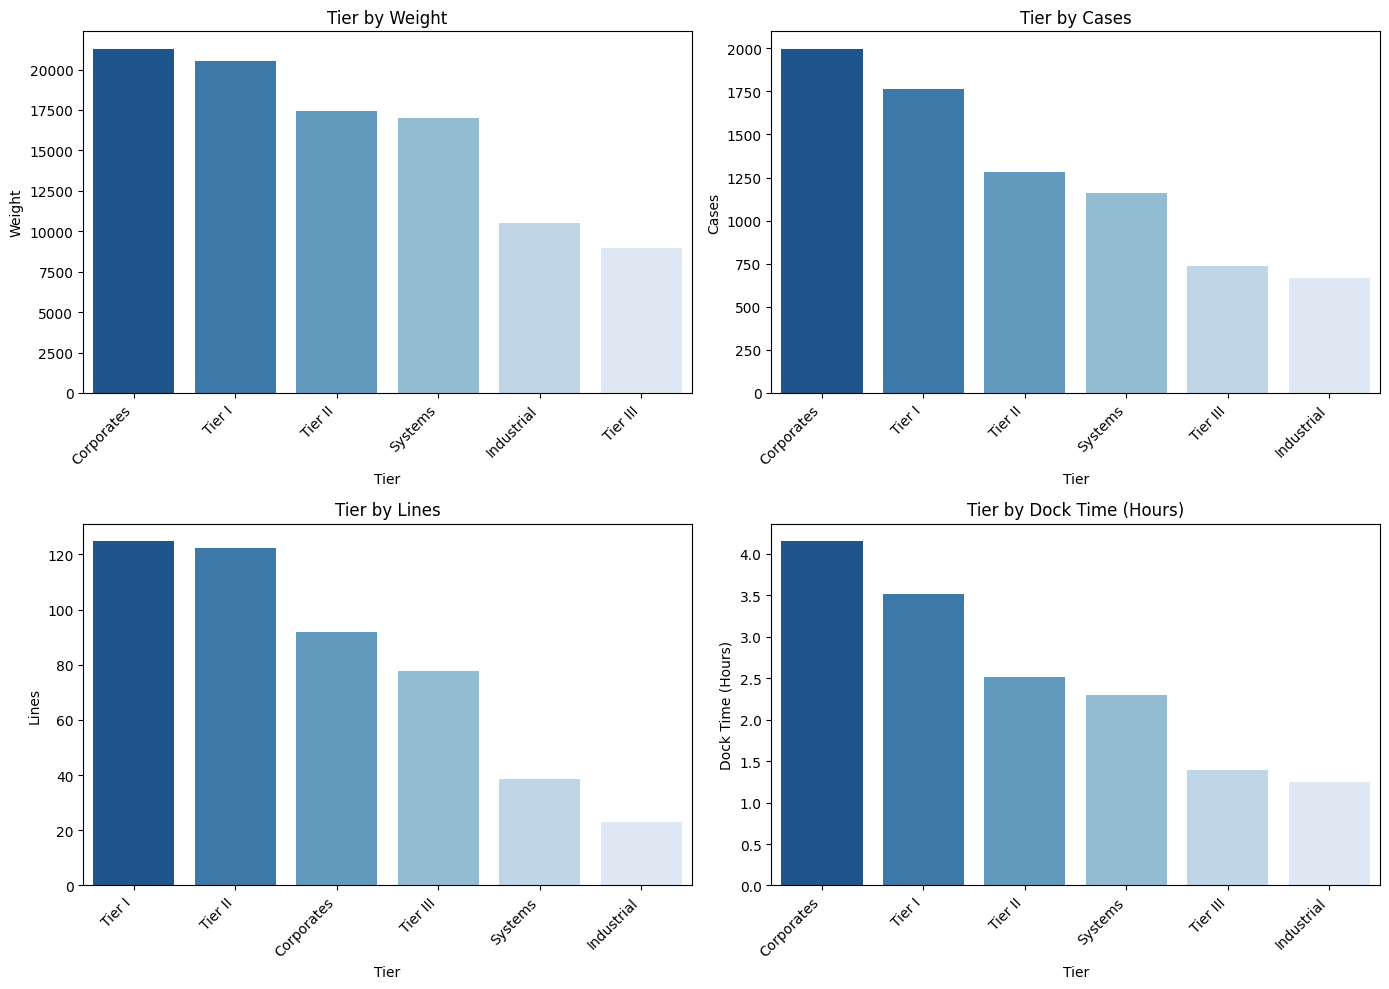

In [ ]:
columns = ["Weight", "Cases", "Lines", "Dock Time (Hours)"]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, col in enumerate(columns):
    sorted_df = df.groupby("Tier")[col].mean().sort_values(ascending=False).head(10)
    sns.barplot(
        x=sorted_df.index,
        y=sorted_df.values,
        ax=axes[i],
        palette="Blues_r"
    )

    axes[i].set_title(f"Tier by {col}")
    axes[i].set_xlabel("Tier")
    axes[i].set_ylabel(col)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha="right")

plt.tight_layout()
plt.show()



Assuming charging by weight
By weight, Depends on the approach. Tier III has the lowest weight but, but high number of order, hence we can encourage them to order more to increase the order number or offered to order higher heavier product

By cases, corporate, and Tier I, and Tier II have high number of cases. which is expected with the moderate number of order. which means needed for improvement in forms of more efficient order to have lower cases. however system has a relatively high number of cases even thought it has the lowest number of order

An ideal customer would have low number of lines(low variation of product) for easier delivery or more efficient packing but with high number of order. Tier I, Tier II, and Corporate with high number of order, they also have high lines. which means inefficient product order. we can improve them by trying to make them order less variation of prodouct while keeping the number of order

By dock time, corporates, tier I, and Tier II could benefit from an improvement. since they have high docking time(inefficient) and high number of order we need to improve their docking time. to pin point whats affecting docking time, more research is needed. but an ideal customer would have low docking time with high number of order. Especially the system tier, they have low number of order but high docking time which means more improvement needed

                     Weight     Lines     Cases  Dock Time (Hours)   Pallets  \
Weight             1.000000  0.443793  0.729691           0.448146  0.718142   
Lines              0.443793  1.000000  0.525389           0.310393  0.071843   
Cases              0.729691  0.525389  1.000000           0.493348  0.715503   
Dock Time (Hours)  0.448146  0.310393  0.493348           1.000000  0.366906   
Pallets            0.718142  0.071843  0.715503           0.366906  1.000000   
Cases/Line        -0.055876 -0.204488  0.035096          -0.051520  0.132362   
PO Count           0.241401  0.400693  0.263175           0.192357  0.070778   
Item Spread        0.071661 -0.209668  0.068055           0.035017  0.231098   

                   Cases/Line  PO Count  Item Spread  
Weight              -0.055876  0.241401     0.071661  
Lines               -0.204488  0.400693    -0.209668  
Cases                0.035096  0.263175     0.068055  
Dock Time (Hours)   -0.051520  0.192357     0.035017  
Pall

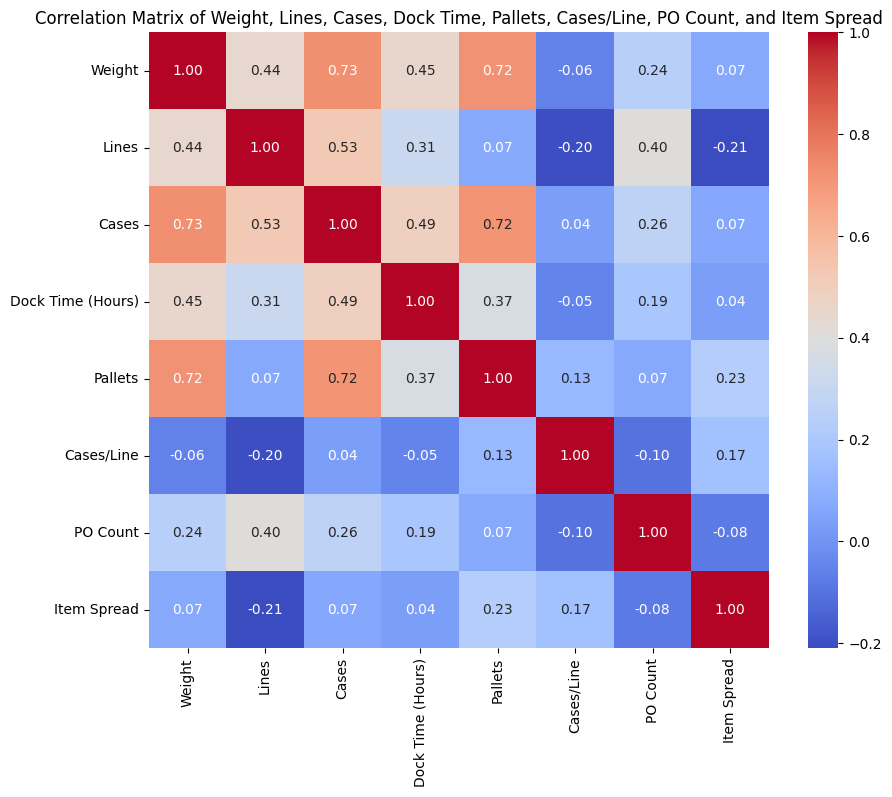

In [ ]:
# prompt: Correlation matrix of df in terms of weight, lines, cases, and dock time

correlation_matrix = df[['Weight', 'Lines', 'Cases', 'Dock Time (Hours)', "Pallets", "Cases/Line", "PO Count", "Item Spread"]].corr()
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Weight, Lines, Cases, Dock Time, Pallets, Cases/Line, PO Count, and Item Spread')
plt.show()


Noted that correlation does not mean causation.

We can improve the weight or the cases by engineering one or another. Inference for Improvement: Customers who order more cases will generally have heavier shipments. You can focus on bulk orders for customers who are already placing high volume orders, as this will help increase the overall order size and weight, leading to higher revenue.  

The others have low correlation which means if we improve the other it wouldnt necessar affect the others

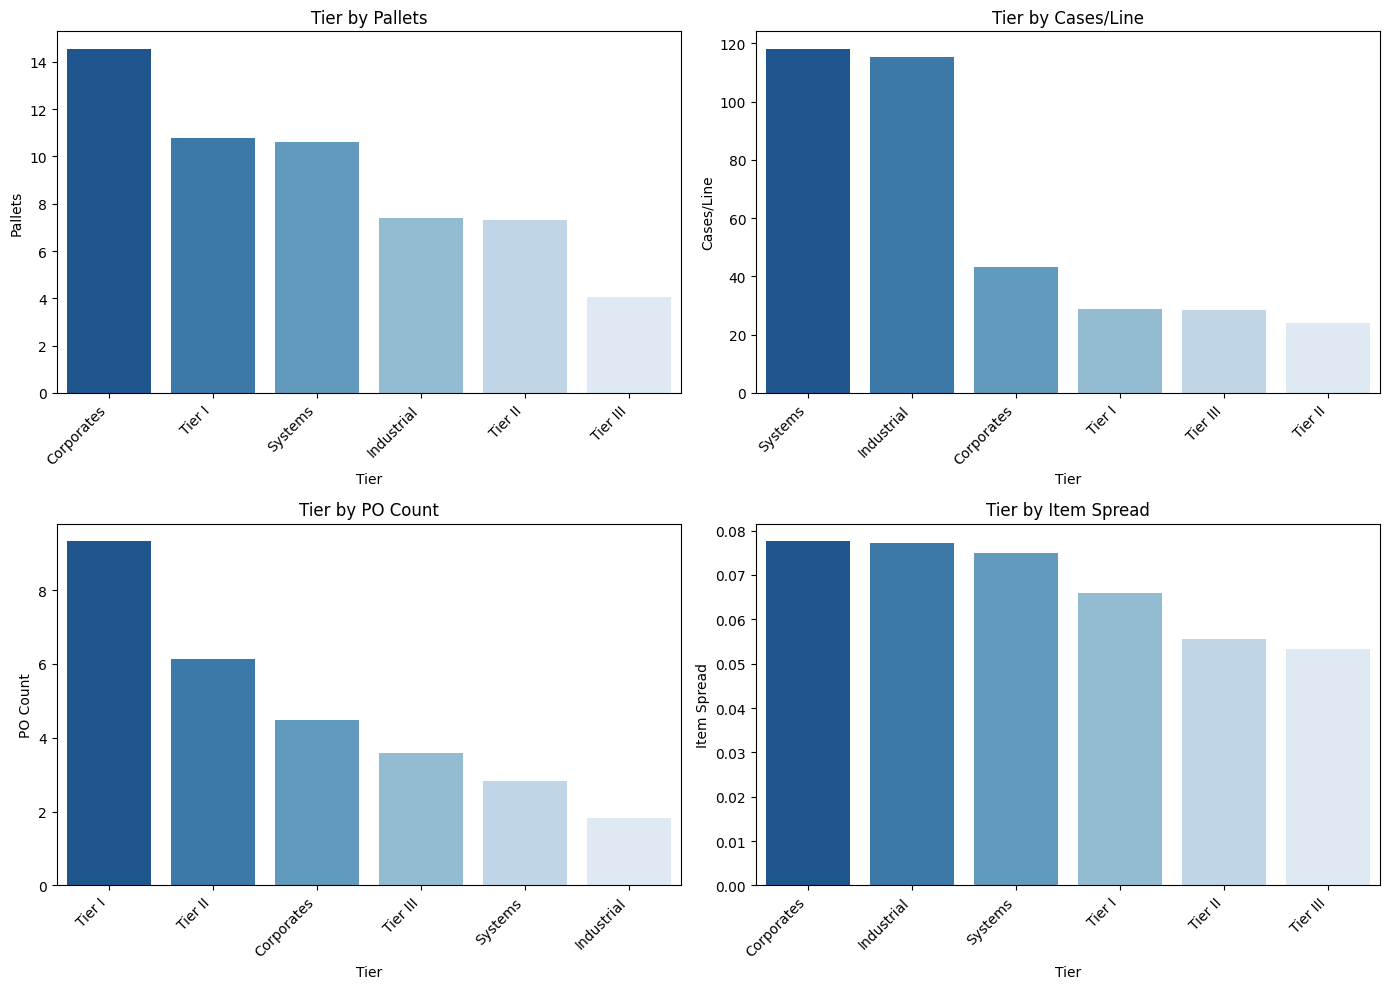

In [ ]:
columns = ["Pallets", "Cases/Line", "PO Count", "Item Spread"]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, col in enumerate(columns):
    sorted_df = df.groupby("Tier")[col].mean().sort_values(ascending=False).head(10)
    sns.barplot(
        x=sorted_df.index,
        y=sorted_df.values,
        ax=axes[i],
        palette="Blues_r"
    )

    axes[i].set_title(f"Tier by {col}")
    axes[i].set_xlabel("Tier")
    axes[i].set_ylabel(col)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha="right")

plt.tight_layout()
plt.show()



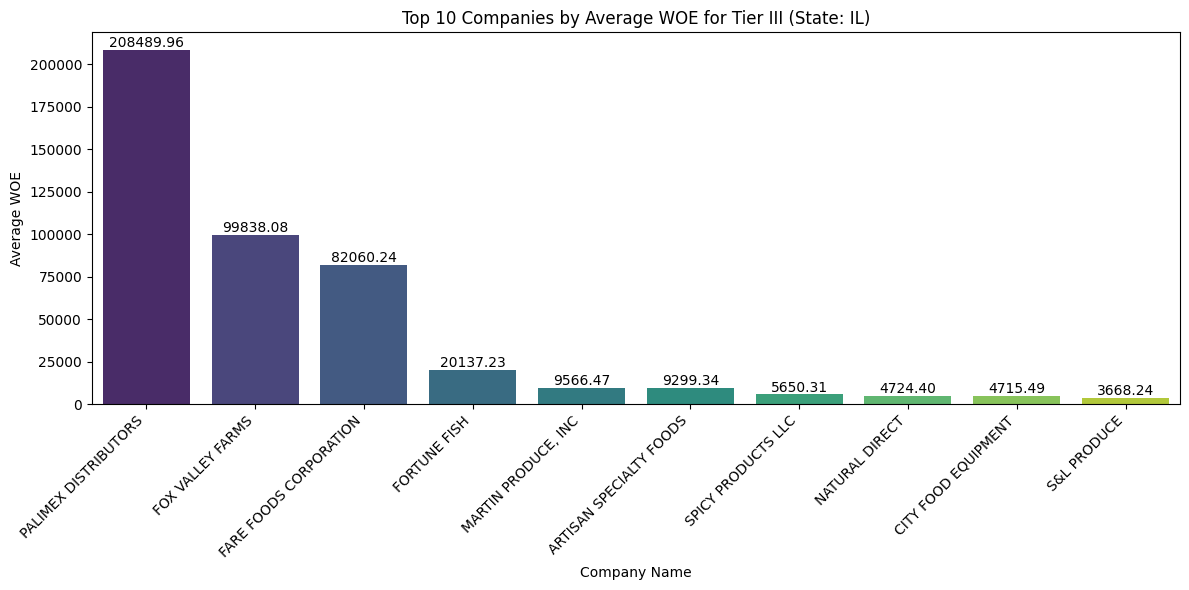

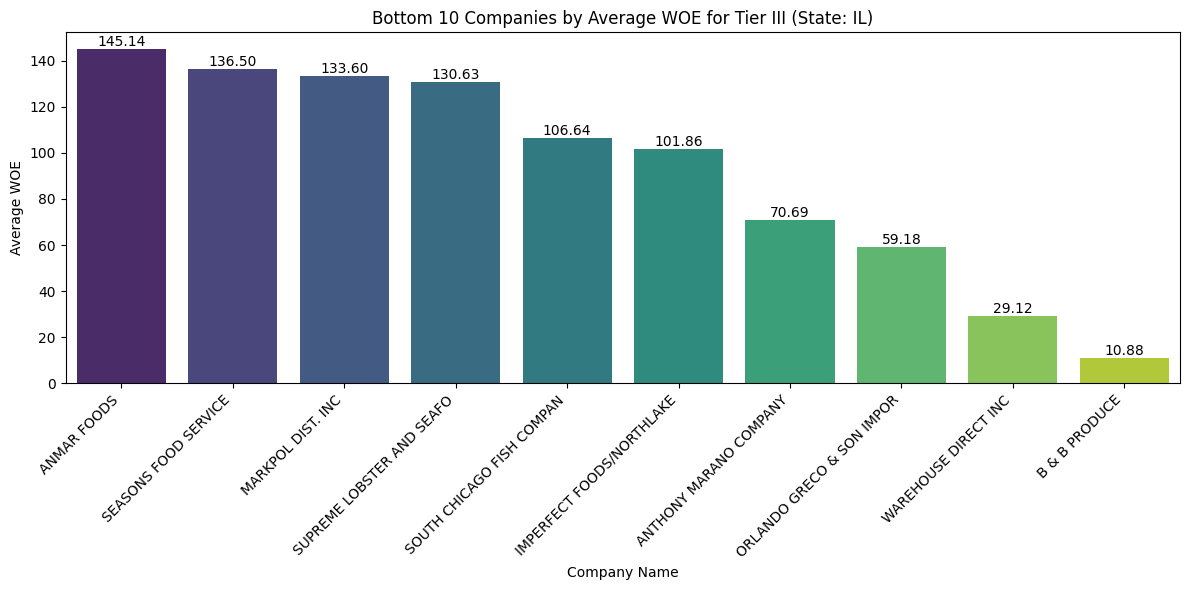

In [ ]:
# Step 1: Filter the data for Tier III and State = IL
tier_iii_il_data = df[(df['Tier'] == 'Tier III') & (df['State'] == 'IL')]

# Step 2: Calculate WOE for each order
tier_iii_il_data['WOE'] = tier_iii_il_data['Weight'] / (tier_iii_il_data['Dock Time (Hours)'] * (tier_iii_il_data['Cases/Line'] * tier_iii_il_data['PO Count']))

# Step 3: Remove rows where WOE is infinity or NaN (created by division by zero)
tier_iii_il_data = tier_iii_il_data[~tier_iii_il_data['WOE'].isin([np.inf, -np.inf])]
tier_iii_il_data = tier_iii_il_data.dropna(subset=['WOE'])  # Remove NaN values (if any)

# Step 4: Calculate the average WOE per company
company_woe = tier_iii_il_data.groupby('Company')['WOE'].mean().sort_values(ascending=False)

# Get top 10 and bottom 10 companies by average WOE
top_10_woe = company_woe.head(10)
bottom_10_woe = company_woe.tail(10)

# Step 5: Visualize the Top 10 companies by WOE
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_10_woe.index, y=top_10_woe.values, palette='viridis')
plt.xlabel('Company Name')
plt.ylabel('Average WOE')
plt.title('Top 10 Companies by Average WOE for Tier III (State: IL)')
plt.xticks(rotation=45, ha='right')

# Add labels above bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

# Step 6: Visualize the Bottom 10 companies by WOE
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=bottom_10_woe.index, y=bottom_10_woe.values, palette='viridis')
plt.xlabel('Company Name')
plt.ylabel('Average WOE')
plt.title('Bottom 10 Companies by Average WOE for Tier III (State: IL)')
plt.xticks(rotation=45, ha='right')

# Add labels above bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

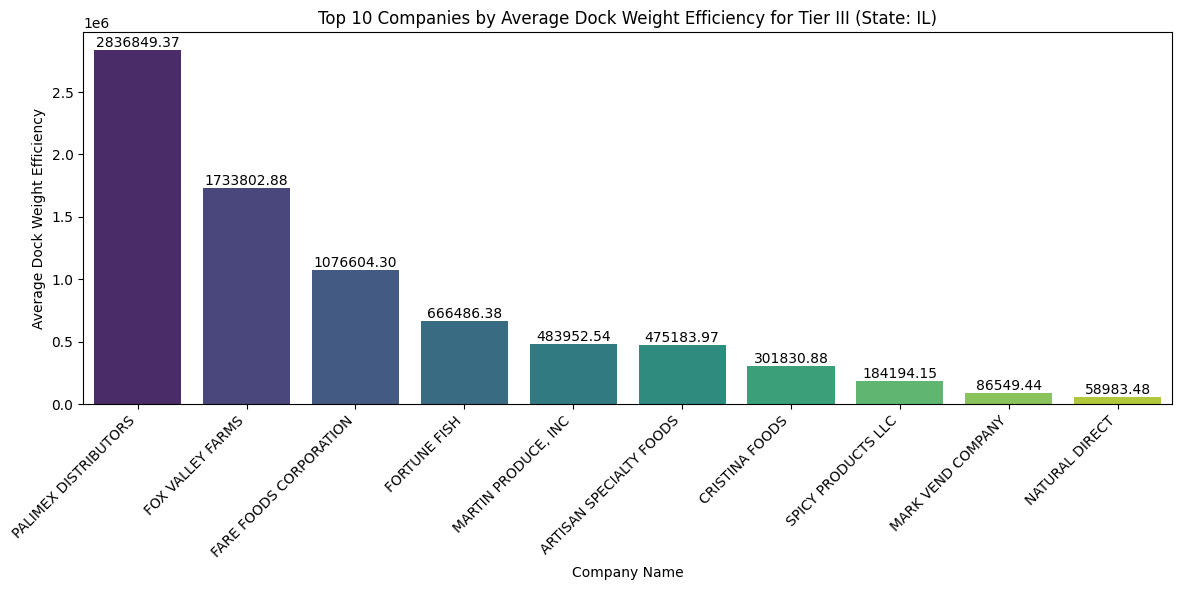

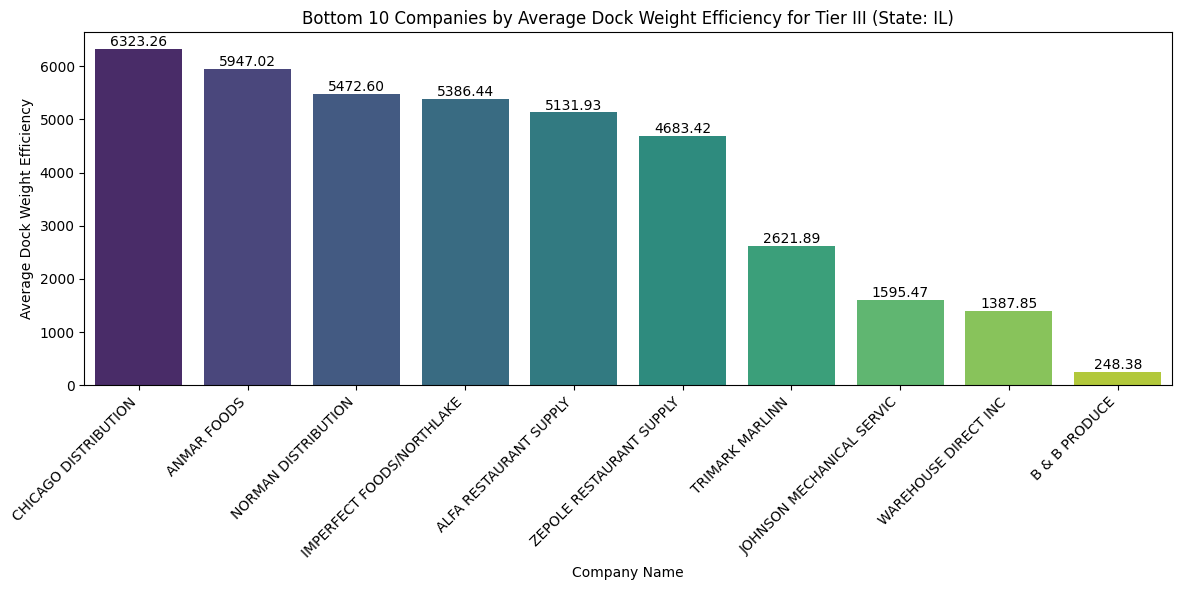

In [ ]:
# Step 1: Filter the data for Tier III and State = IL
tier_iii_il_data = df[(df['Tier'] == 'Tier III') & (df['State'] == 'IL')]

# Step 2: Calculate 'dock_weight_efficient' for each order
tier_iii_il_data['dock_weight_efficient'] = tier_iii_il_data['Weight'] / tier_iii_il_data['Dock Time (Hours)']

# Step 3: Replace infinite values and NaNs
tier_iii_il_data['dock_weight_efficient'].replace([float('inf'), -float('inf')], np.nan, inplace=True)

# Step 4: Calculate the mean dock_weight_efficient for each company
company_woe = tier_iii_il_data.groupby('Company')['dock_weight_efficient'].mean().dropna().sort_values(ascending=False)

# Get top 10 and bottom 10 companies by average dock_weight_efficient
top_10_companies = company_woe.head(10)
bottom_10_companies = company_woe.tail(10)

# Step 5: Visualize the Top 10 companies by dock_weight_efficient
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_10_companies.index, y=top_10_companies.values, palette='viridis')
plt.xlabel('Company Name')
plt.ylabel('Average Dock Weight Efficiency')
plt.title('Top 10 Companies by Average Dock Weight Efficiency for Tier III (State: IL)')
plt.xticks(rotation=45, ha='right')

# Add labels above bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

# Step 6: Visualize the Bottom 10 companies by dock_weight_efficient
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=bottom_10_companies.index, y=bottom_10_companies.values, palette='viridis')
plt.xlabel('Company Name')
plt.ylabel('Average Dock Weight Efficiency')
plt.title('Bottom 10 Companies by Average Dock Weight Efficiency for Tier III (State: IL)')
plt.xticks(rotation=45, ha='right')

# Add labels above bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

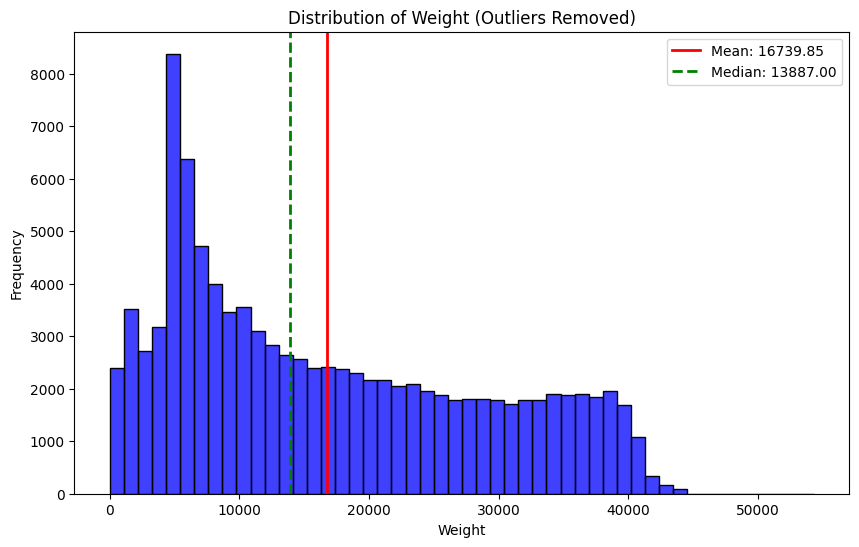

In [ ]:
#Weight
Q1 = df["Weight"].quantile(0.25)
Q3 = df["Weight"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df_filtered = df[(df["Weight"] >= lower_bound) & (df["Weight"] <= upper_bound)]


mean_val = df_filtered["Weight"].mean()
median_val = df_filtered["Weight"].median()


plt.figure(figsize=(10, 6))
sns.histplot(df_filtered["Weight"], bins=50, color='blue')


plt.axvline(x=mean_val, color='red', linestyle='-', linewidth=2, label=f'Mean: {mean_val:.2f}')
plt.axvline(x=median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')


plt.title("Distribution of Weight (Outliers Removed)")
plt.xlabel("Weight")
plt.ylabel("Frequency")
plt.legend()
plt.show()


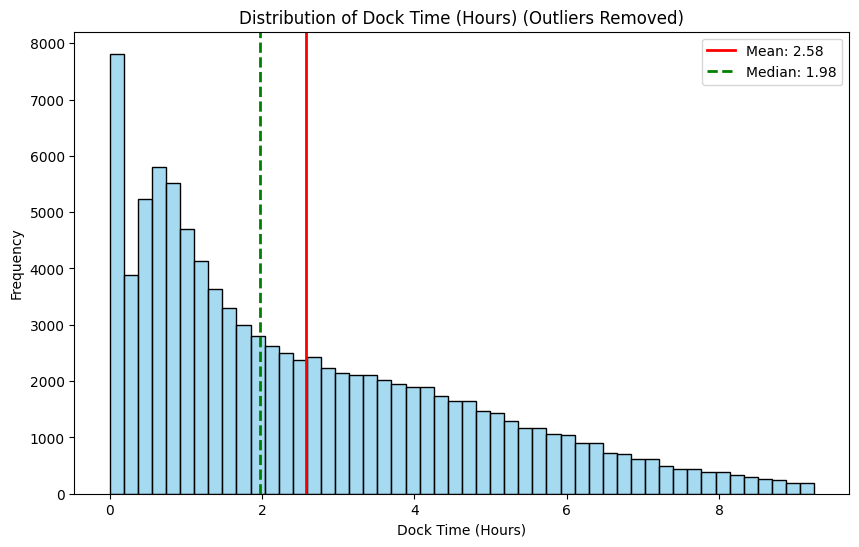

In [ ]:
# Dock Time (Hours)
Q1_dock = df["Dock Time (Hours)"].quantile(0.25)
Q3_dock = df["Dock Time (Hours)"].quantile(0.75)
IQR_dock = Q3_dock - Q1_dock

lower_bound_dock = Q1_dock - 1.5 * IQR_dock
upper_bound_dock = Q3_dock + 1.5 * IQR_dock

df_filtered_dock = df[(df["Dock Time (Hours)"] >= lower_bound_dock) & (df["Dock Time (Hours)"] <= upper_bound_dock)]

mean_dock = df_filtered_dock["Dock Time (Hours)"].mean()
median_dock = df_filtered_dock["Dock Time (Hours)"].median()

plt.figure(figsize=(10, 6))
sns.histplot(df_filtered_dock["Dock Time (Hours)"], bins=50, color='skyblue')

plt.axvline(x=mean_dock, color='red', linestyle='-', linewidth=2, label=f'Mean: {mean_dock:.2f}')
plt.axvline(x=median_dock, color='green', linestyle='--', linewidth=2, label=f'Median: {median_dock:.2f}')

plt.title("Distribution of Dock Time (Hours) (Outliers Removed)")
plt.xlabel("Dock Time (Hours)")
plt.ylabel("Frequency")
plt.legend()
plt.show()


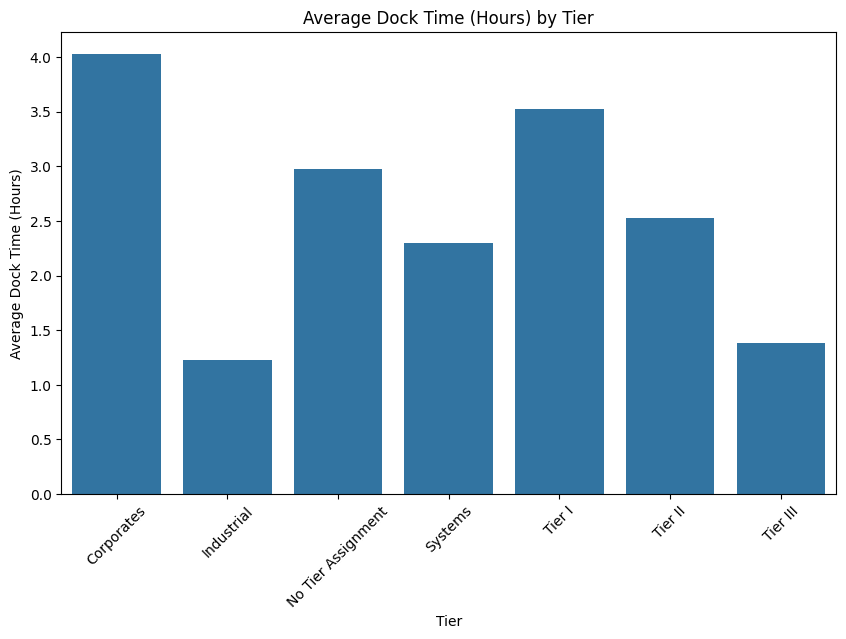

F-statistic: 2875.4026121397956
P-value: 0.0
There is a statistically significant difference in dock time between tiers.


In [ ]:

# Group data by Tier and calculate the mean dock time for each tier
tier_dock_time = df.groupby('Tier')['Dock Time (Hours)'].mean()

# Create a bar plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.barplot(x=tier_dock_time.index, y=tier_dock_time.values)
plt.title('Average Dock Time (Hours) by Tier')
plt.xlabel('Tier')
plt.ylabel('Average Dock Time (Hours)')
plt.xticks(rotation=45)
plt.show()

# Perform a statistical test (ANOVA) to determine if there's a significant difference
# in dock time between tiers.
from scipy.stats import f_oneway

tiers = df['Tier'].unique()
tier_groups = [df['Dock Time (Hours)'][df['Tier'] == tier] for tier in tiers]

f_statistic, p_value = f_oneway(*tier_groups)

print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("There is a statistically significant difference in dock time between tiers.")
else:
    print("There is no statistically significant difference in dock time between tiers.")


Tier
Corporates             44.437660
Industrial            118.272411
No Tier Assignment     42.346979
Systems               120.130665
Tier I                 27.286451
Tier II                23.398662
Tier III               28.369034
Name: Cases/Line, dtype: float64


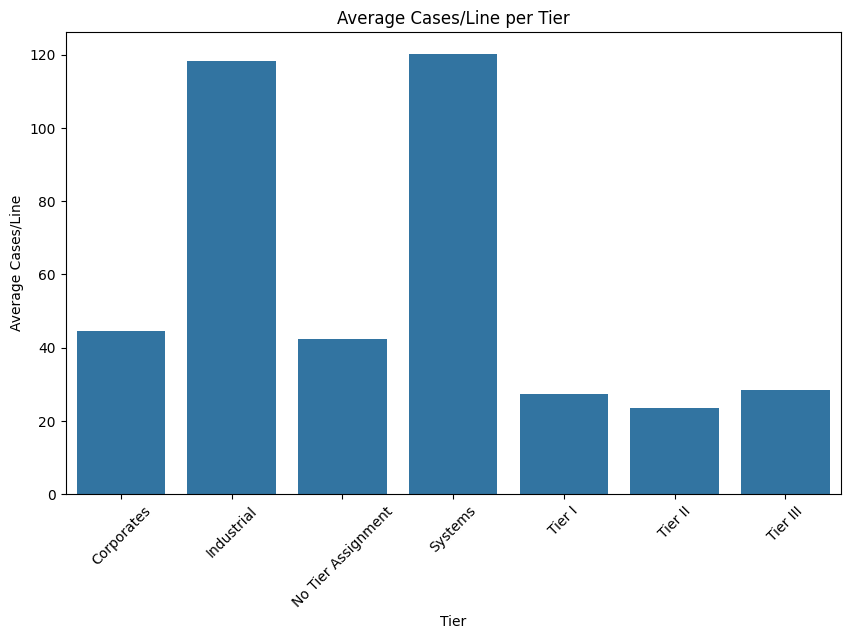

In [ ]:

# Calculate the average Cases/Line for each tier
tier_cases_per_line = df.groupby('Tier')['Cases/Line'].mean()

# Display the results
print(tier_cases_per_line)

# Create a bar plot to visualize the average Cases/Line per tier
plt.figure(figsize=(10, 6))
sns.barplot(x=tier_cases_per_line.index, y=tier_cases_per_line.values)
plt.title('Average Cases/Line per Tier')
plt.xlabel('Tier')
plt.ylabel('Average Cases/Line')
plt.xticks(rotation=45)
plt.show()
